# Project: Test a Perceptual Phenomenon

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

#### 1. What is our independent variable? What is our dependent variable?
Independent variable is whether the test is a congruent one or an incongruent one, meaning the colors of words matching words, or not. Dependent variable is the time that takes a reader to read aloud whole set of words.


#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
Hypothesis in this experiment, is that humans can read faster in congruent conditions because there is no contradicting information. Whereas in the incongruent condition, written word contradicts the color of the word itself so brain takes some time to process this information. For that reason, it takes longer to process in incongruent condition. 

Therefore **null hypothesis** in this experiment is; there is no significant time difference that it takes for the population to read whole list of words in a congruent or incongruent condition.

Mathematically;
$H0 : \mu_{congruent} = \mu_{incongruent}$

My **alternative hypothesis** is there will be a significant time difference between congruent and incongruent conditon, and I am expecting this difference to be in the form of incongruent condition taking significantly more time compared to congruent one.

$HA : \mu_{congruent} < \mu_{incongruent}$

I will apply one tailed t-test in positive direction. I selected t-test as I dont have access to the population mean but just a sample timings. And one tailed test in the positive direction as I am expecting increase in timings for incongruent.

Also this is an example of dependent t-test as the participants of the experiment, take part in both conditions for congruent and incongruent. 


#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.



In [61]:
# Imports 
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import t
%matplotlib inline

path = r'stroopdata.csv'

dataFrame = pd.read_csv(path)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [62]:
dataFrame.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.



Populating the interactive namespace from numpy and matplotlib


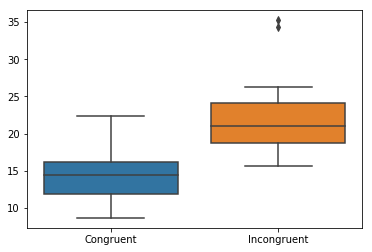

In [63]:

%pylab inline

ax = sns.boxplot(data=dataFrame)

Observing the plot we can see, the time it takes for a reader to read the whole list in congruent condition is less than incongruent condition. Two interesting things I noticed are, the minimum time for incongruent condition is actually more than the mean of congruent condition, and the two outliers for incongruent condition are more than the double of the mean time for congruent.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?



First I will find out Point estimate; $\mu_{con} - \mu_{in}$

In [14]:
point_estimate = dataFrame["Congruent"].mean() - dataFrame["Incongruent"].mean() 
point_estimate

-7.964791666666665

Then I need standard deviation of each difference; s

In [31]:
dataFrame['Difference'] = dataFrame['Congruent'] - dataFrame['Incongruent']
dataFrame

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [32]:
s = dataFrame['Difference'].std()
s

4.864826910359056

Now we need to find out t-statistic.
I will do this in 2 ways, first do my own calculation and then check if it agrees with scipy calculation.
The equation is;
  $t = \frac{\mu_{con} - \mu_{in}}{\frac{s}{\sqrt{n}}}$

In [24]:
t = point_estimate / (dataFrame['Difference'].std()/math.sqrt(24))
t

-8.020706944109955

In [28]:
# https://stackoverflow.com/questions/28405442/calculating-t-statistics-using-scipy-stats
(np.average(dataFrame['Congruent'] - dataFrame['Incongruent']) * np.sqrt(len(dataFrame['Congruent']))) / (np.std(dataFrame['Congruent'] - dataFrame['Incongruent'], ddof=1))

-8.0207069441099552

So with both methods they agree. Moving on now we need to find t critical value.
Looking from the table for .05 with 23 degrees of freedom it is -1.714
Lets check it with Python;

In [27]:
t.ppf(.95, 23)

1.7138715277470473

So interpretting these values we reject the null as -8.02 is much less than -1.714. So clearly incongruent case take longer in a statistically meaningful way, which is logical as it is harder to read the numbers in conflicting cases.

In [35]:
cohens_d = dataFrame['Difference'].mean() / dataFrame['Difference'].std()
cohens_d

-1.6372199491222625

In [42]:
confidence_interval_negative = dataFrame['Difference'].mean() + -1.714*(dataFrame['Difference'].std()/math.sqrt(24))
print(confidence_interval_negative)
confidence_interval_positive = dataFrame['Difference'].mean() - -1.714*(dataFrame['Difference'].std()/math.sqrt(24))
print(confidence_interval_positive)

-9.666842746676743
-6.262740586656591


So the confidence interval is (-9.67,-6.26).

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

As we discused earlier, this is because there are conflicting information where the mind needs to process, so this takes longer. A similar concept where I observe is reading numbers in a foreign language. Being a non-native speaker of English, I find it difficult to read numbers as my mind brings the information in my mother tongue but it takes time to bring this in English. So if I am not careful, I say it in my mother tongue even when I am speaking English.